In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
df = pd.read_csv('iris.csv')

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

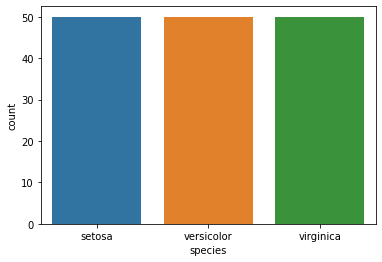

In [9]:
sns.countplot(data=df, x='species')

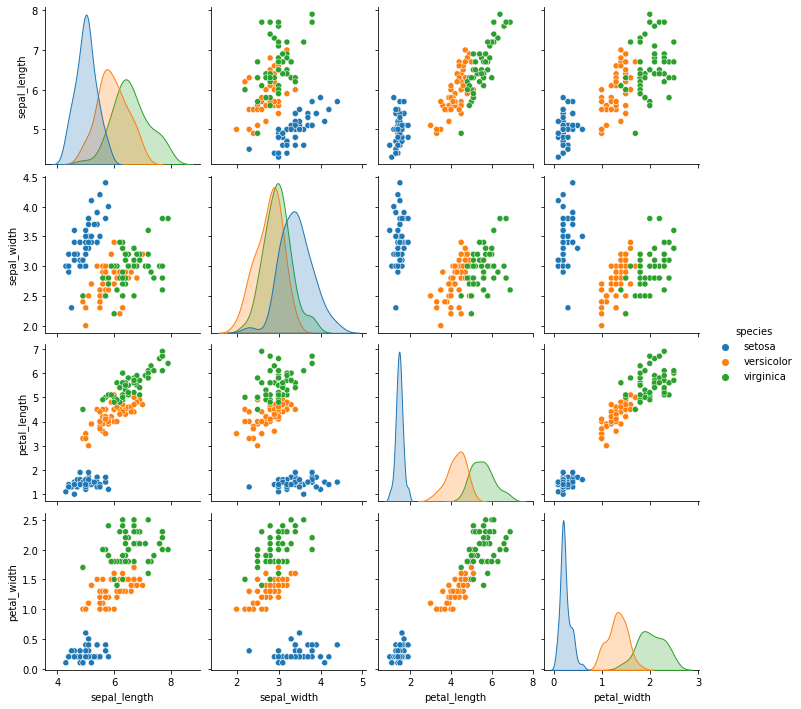

In [10]:
sns.pairplot(data=df, hue='species')

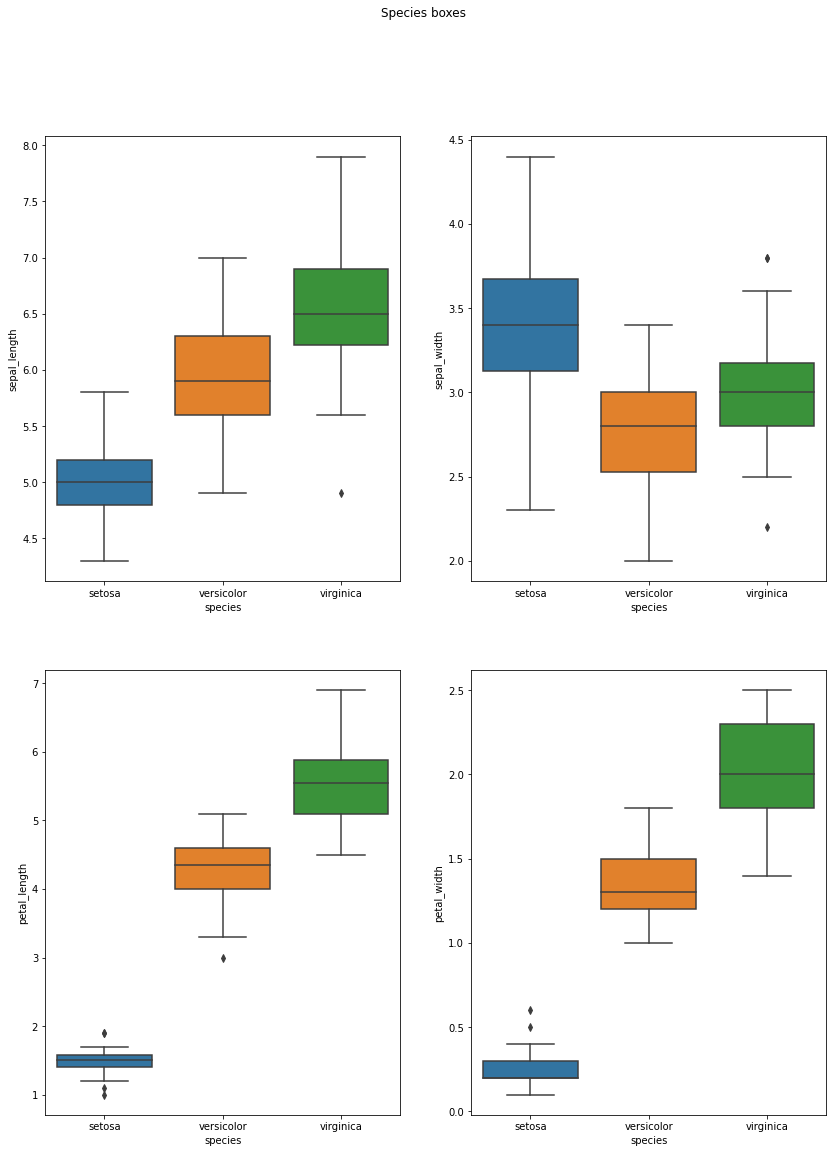

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(14, 18))
fig.suptitle('Species boxes')
sns.boxplot(ax=axes[0, 0], data=df, x='species', y='sepal_length')
sns.boxplot(ax=axes[0, 1], data=df, x='species', y='sepal_width')
sns.boxplot(ax=axes[1, 0], data=df, x='species', y='petal_length')
sns.boxplot(ax=axes[1, 1], data=df, x='species', y='petal_width')

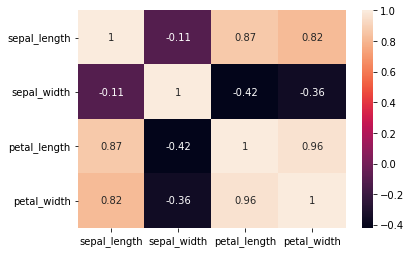

In [12]:
sns.heatmap(df.select_dtypes(np.number).corr(), annot=True)

In [13]:
X = df.drop('species', axis=1).values
y = df['species']

Encoding species

In [14]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Modeling

In [17]:
from sklearn.linear_model import LogisticRegression


log_model = LogisticRegression(solver="saga")

In [18]:
param_grid = {
    "penalty" : ["l1", "l2", "elasticnet"],
    "multi_class" : ['auto', 'ovr', 'multinomial'],
    "l1_ratio" : np.linspace(0,1,20),
    "C" : np.logspace(0, 10, 20),
    "max_iter" : [100, 250, 500, 750, 1000]
}

In [19]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


grid_cv = HalvingGridSearchCV(log_model, param_grid, verbose=2, cv=5)

In [20]:
grid_cv.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[CV] END C=4832.930238571752, l1_ratio=0.9473684210526315, max_iter=500, multi_class=multinomial, penalty=l1; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.9473684210526315, max_iter=500, multi_class=multinomial, penalty=l1; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.9473684210526315, max_iter=500, multi_class=multinomial, penalty=l1; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.9473684210526315, max_iter=500, multi_class=multinomial, penalty=l1; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.9473684210526315, max_iter=500, multi_class=multinomial, penalty=l1; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.9473684210526315, max_iter=500, multi_class=multinomial, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.9473684210526315, max_iter=500, multi_class=multinomial, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.94736

HalvingGridSearchCV(estimator=LogisticRegression(solver='saga'),
                    param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.858667...]),
                                'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                                'max_iter': [100, 250, 500, 750, 1000],
                                'multi_class': ['auto', 'ovr', 'multinomial'],
                                'penalty': ['l1', 'l2', 'elasticnet']},
                    verbose=2)

In [27]:
grid_cv.best_estimator_

LogisticRegression(C=37.926901907322495, l1_ratio=0.5789473684210527,
                   max_iter=750, penalty='elasticnet', solver='saga')

In [29]:
grid_cv.best_score_

0.9666666666666668

In [32]:
pd.DataFrame(grid_cv.cv_results_).head()

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_l1_ratio,param_max_iter,param_multi_class,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0,30,0.002561,0.000196,0.000320,0.000060,1.0,0.0,100,auto,...,0.933333,0.081650,17401,0.916667,0.916667,1.000000,1.000000,0.916667,0.950000,0.040825
1,0,30,0.002394,0.000332,0.000313,0.000037,1.0,0.0,100,auto,...,0.900000,0.081650,19492,0.958333,0.916667,1.000000,0.916667,0.916667,0.941667,0.033333
2,0,30,0.002340,0.000333,0.000277,0.000010,1.0,0.0,100,auto,...,0.900000,0.081650,19492,0.958333,0.916667,1.000000,0.916667,0.916667,0.941667,0.033333
3,0,30,0.003025,0.000139,0.000283,0.000012,1.0,0.0,100,ovr,...,0.866667,0.066667,22154,0.916667,0.916667,0.916667,0.875000,0.916667,0.908333,0.016667
4,0,30,0.002964,0.000623,0.000538,0.000336,1.0,0.0,100,ovr,...,0.833333,0.000000,23836,0.875000,0.916667,0.916667,0.875000,0.916667,0.900000,0.020412


In [49]:
grid_cv.best_params_

{'C': 37.926901907322495,
 'l1_ratio': 0.5789473684210527,
 'max_iter': 750,
 'multi_class': 'auto',
 'penalty': 'elasticnet'}

In [61]:
pd.DataFrame([grid_cv.best_params_]).to_csv('best_params_log_reg_iris.csv')

In [77]:
best_params = pd.read_csv('best_params_log_reg_iris.csv')

In [78]:
best_params.drop('Unnamed: 0', axis=1, inplace=True)

In [82]:
best_params

,C,l1_ratio,max_iter,multi_class,penalty
0,37.926902,0.578947,750,auto,elasticnet


In [83]:
best_params = {key : value for key, value in zip(best_params.columns, best_params.iloc[0,:].values)}

In [85]:
best_params["solver"] = "saga"
best_params

{'C': 37.926901907322495,
 'l1_ratio': 0.5789473684210527,
 'max_iter': 750,
 'multi_class': 'auto',
 'penalty': 'elasticnet',
 'solver': 'saga'}

In [86]:
from sklearn.linear_model import LogisticRegression


log_model = LogisticRegression(**best_params)

In [87]:
log_model.fit(X_train, y_train)

LogisticRegression(C=37.926901907322495, l1_ratio=0.5789473684210527,
                   max_iter=750, penalty='elasticnet', solver='saga')

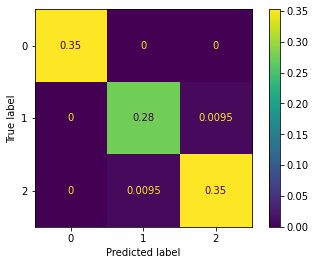

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay


ConfusionMatrixDisplay.from_estimator(log_model, X_train, y_train, normalize='all')

In [89]:
from sklearn.metrics import classification_report


print(classification_report(y_test, log_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [90]:
log_model.score(X_test, y_test)

1.0

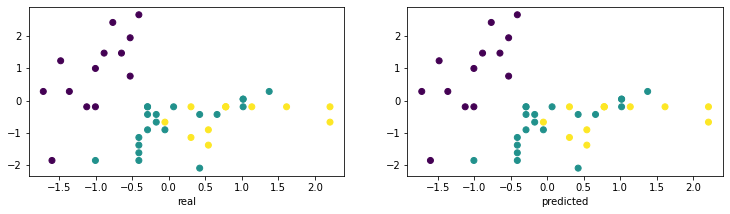

In [103]:
plt.figure(figsize=(26,18))
plt.subplot(5,4,1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.xlabel('real')

plt.subplot(5,4,2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=log_model.predict(X_test))

plt.xlabel('predicted')

plt.show()